<a href="https://colab.research.google.com/github/sangsucki/ML-tutor/blob/main/3_Regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 03. 머신러닝 회귀 문제 연습하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 분석에 필요한 라이브러리를 불러옵니다
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

## Step 1. 예측할 데이터 불러오기

### 문제 01. 데이터 불러오기

In [ ]:
base_path = '/content/drive/MyDrive/Colab Notebooks/머신러닝심화과정/data/energy'
train = pd.read_csv(base_path + "/train.csv",encoding='cp949')
test = pd.read_csv(base_path + "/test.csv", encoding='cp949')

### 문제 02. 데이터 미리보기

In [ ]:
# 데이터 크기 확인
print(train.shape, test.shape)

# 데이터 일부 확인
display(train.head())
display(test.head())

(122400, 10) (10080, 9)


,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 문제 03. 데이터 확인하기

In [ ]:
# train 데이터에서 결측치가 있는 column 확인하기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   num         122400 non-null  int64  
 1   date_time   122400 non-null  object 
 2   전력사용량(kWh)  122400 non-null  float64
 3   기온(°C)      122400 non-null  float64
 4   풍속(m/s)     122400 non-null  float64
 5   습도(%)       122400 non-null  float64
 6   강수량(mm)     122400 non-null  float64
 7   일조(hr)      122400 non-null  float64
 8   비전기냉방설비운영   122400 non-null  float64
 9   태양광보유       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


In [ ]:
# test도 확인
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num           10080 non-null  int64  
 1   date_time     10080 non-null  object 
 2   기온(°C)        3360 non-null   float64
 3   풍속(m/s)       3360 non-null   float64
 4   습도(%)         3360 non-null   float64
 5   강수량(mm, 6시간)  1680 non-null   float64
 6   일조(hr, 3시간)   3360 non-null   float64
 7   비전기냉방설비운영     2296 non-null   float64
 8   태양광보유         1624 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 708.9+ KB


## Step 2. Data Preprocessing

- 데이터에 있는 결측치를 처리합니다.

- 결측치를 처리하기 위해 데이터에 잘못 기록된 점들을 확인합니다.

### 문제 04. train data에서 결측치가 있는 데이터 뽑기

In [ ]:
# 데이터가 거의 비어있는 row가 있는지 확인합니다.
missing_rows = train[train.isnull().any(axis=1)]
missing_rows

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유


### 문제 05. test data에서 결측치가 있는 데이터 뽑기

In [ ]:
# dtype이 object인 column들을 가져옵니다.
missing_rows = test[test.isnull().any(axis=1)]
missing_rows

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 결측치 채우기

- test data의 결측치를 채워봅시다.

- 이 데이터는 시간 순서에 따른 정보를 가지는 시계열 데이터(time-series data)이므로, 평균이나 최빈값 같은값으로 한번에 채우는 것은 위험합니다.

- column마다 특성이 다르므로, 날씨와 관련된 정보들(numeric features)과 건물 정보(categorical features)를 다른 방법으로 결측치를 처리해줍니다.

- 날씨 정보들은 시간 순으로 인접한 데이터를 통해서 값을 채워주는 보간법(interpolation method)를 사용해서 결측치를 채워봅시다.

- 건물 정보들은 train data를 보고, 같은 건물 번호가 같은 정보를 가진다면, 그 정보들만 추출해서 채워줍니다.

### 문제 06. 결측치 패턴 파악하기

In [ ]:
# 결측치 패턴 확인하기
test.head(30)

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,2020-08-25 05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,2020-08-25 06,26.1,1.3,83.0,0.0,0.0,NaN,NaN
7,1,2020-08-25 07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,2020-08-25 08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,2020-08-25 09,28.8,1.2,77.0,NaN,1.1,NaN,NaN


- 기온, 풍속, 습도, 일조량은 3시간마다 측정되어 사이사이에 2칸씩 결측치가 있습니다.

- 강수량은 6시간마다 측정되어 사이사이에 5칸씩 결측치가 있습니다.

- 건물 정보들은 랜덤하게 비어있습니다.

### 문제 07. 건물 정보 추출하기

- test data의 건물 정보를 채우기 위해서 train data에 있는 건물 정보를 추출합니다.

In [ ]:
# train data에서 건물 정보만 추출하기
building_info = train[["num", "비전기냉방설비운영", "태양광보유"]]
building_info

,num,비전기냉방설비운영,태양광보유
0,1,0.0,0.0
1,1,0.0,0.0
2,1,0.0,0.0
3,1,0.0,0.0
4,1,0.0,0.0
...,...,...,...
122395,60,1.0,1.0
122396,60,1.0,1.0
122397,60,1.0,1.0
122398,60,1.0,1.0


In [ ]:
# 같은 건물번호인 데이터는 모두 같은 데이터를 가집니다. (한번 확인해보세요)
# 하나의 건물당 하나의 정보를 남기고 중복되는 행을 지웁니다.
building_info = building_info.drop_duplicates()
building_info

,num,비전기냉방설비운영,태양광보유
0,1,0.0,0.0
2040,2,1.0,0.0
4080,3,1.0,1.0
6120,4,1.0,1.0
8160,5,1.0,0.0
10200,6,0.0,0.0
12240,7,1.0,0.0
14280,8,1.0,1.0
16320,9,0.0,1.0
18360,10,1.0,0.0


### 문제 08. 건물 정보 결측치 채우기

In [ ]:
# test data의 건물번호가 building_info에 있는 번호와 같으면 해당 정보로 결측치를 채워줍니다.
for num in range(1, 61):
    test.loc[test.num == num, "비전기냉방설비운영"] = building_info.loc[building_info.num == num, "비전기냉방설비운영"].values[0]
    test.loc[test.num == num, "태양광보유"] = building_info.loc[building_info.num == num, "태양광보유"].values[0]

test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,0.0,0.0
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,0.0,0.0
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN,1.0,1.0
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN,1.0,1.0
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN,1.0,1.0


### 문제 09. table join을 사용하여 결측치 채우기

- 위의 for문을 사용하는 방법보다 좀 더 간단하게, test 데이터와 building_info의 num를 기준으로 join 연산을 수행하면 한번에 해결할 수 있습니다.

In [ ]:
# join을 수행하기 위해서 test 데이터에 있는 기존 column을 제거합니다.
test.drop(columns=["비전기냉방설비운영", "태양광보유"], inplace=True)
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)"
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN


In [ ]:
# num column을 기준으로 join 연산을 수행합니다.
test = pd.merge(test, building_info, on="num")
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,0.0,0.0
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,0.0,0.0
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN,1.0,1.0
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN,1.0,1.0
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN,1.0,1.0


### 문제 10. 날씨 정보 결측치 채우기

In [ ]:
# test 데이터의 날씨 정보 column들을 보간법으로 채웁니다.
# pad method를 사용하면 이전에 등장했던 가장 가까운 값으로 채워줍니다.
test = test.interpolate(method="pad")
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,0.0,0.0
1,1,2020-08-25 01,27.8,1.5,74.0,0.0,0.0,0.0,0.0
2,1,2020-08-25 02,27.8,1.5,74.0,0.0,0.0,0.0,0.0
3,1,2020-08-25 03,27.3,1.1,78.0,0.0,0.0,0.0,0.0
4,1,2020-08-25 04,27.3,1.1,78.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,29.0,3.3,65.0,0.0,0.8,1.0,1.0
10076,60,2020-08-31 20,29.0,3.3,65.0,0.0,0.8,1.0,1.0
10077,60,2020-08-31 21,27.9,4.1,68.0,0.0,0.0,1.0,1.0
10078,60,2020-08-31 22,27.9,4.1,68.0,0.0,0.0,1.0,1.0


In [ ]:
# 사이 정보를 선형식으로 채워주는 linear method가 좀 더 좋아보입니다.
test = test.interpolate(method="linear")
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,0.0,0.0
1,1,2020-08-25 01,27.8,1.5,74.0,0.0,0.0,0.0,0.0
2,1,2020-08-25 02,27.8,1.5,74.0,0.0,0.0,0.0,0.0
3,1,2020-08-25 03,27.3,1.1,78.0,0.0,0.0,0.0,0.0
4,1,2020-08-25 04,27.3,1.1,78.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,29.0,3.3,65.0,0.0,0.8,1.0,1.0
10076,60,2020-08-31 20,29.0,3.3,65.0,0.0,0.8,1.0,1.0
10077,60,2020-08-31 21,27.9,4.1,68.0,0.0,0.0,1.0,1.0
10078,60,2020-08-31 22,27.9,4.1,68.0,0.0,0.0,1.0,1.0


## Step 3. Feature Engineering

- 분석에 사용할 feature들을 만들고, 학습을 위한 데이터를 준비하는 단계입니다.

- 모든 categorical feature들을 변환하여 데이터를 feature vector로 만들어봅니다.

### 문제 11. categorical feature들 확인하기

In [ ]:
# train, test categorical feature들 확인하기
train_categories = [col for col, dtype in zip(train.columns, train.dtypes) if dtype=='object']
test_categories = [col for col, dtype in zip(test.columns, test.dtypes) if dtype=='object']

In [ ]:
print(train_categories)
print(test_categories)

['date_time']
['date_time']


### 문제 12. date_time을 시간정보로 변환하기

In [ ]:
# datetime data type으로 변환하기
train.date_time = pd.to_datetime(train.date_time)
test.date_time = pd.to_datetime(test.date_time)

In [ ]:
# 변경되었는지 확인하기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   num         122400 non-null  int64         
 1   date_time   122400 non-null  datetime64[ns]
 2   전력사용량(kWh)  122400 non-null  float64       
 3   기온(°C)      122400 non-null  float64       
 4   풍속(m/s)     122400 non-null  float64       
 5   습도(%)       122400 non-null  float64       
 6   강수량(mm)     122400 non-null  float64       
 7   일조(hr)      122400 non-null  float64       
 8   비전기냉방설비운영   122400 non-null  float64       
 9   태양광보유       122400 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 9.3 MB


In [ ]:
# test data도 확인하기
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   num           10080 non-null  int64         
 1   date_time     10080 non-null  datetime64[ns]
 2   기온(°C)        10080 non-null  float64       
 3   풍속(m/s)       10080 non-null  float64       
 4   습도(%)         10080 non-null  float64       
 5   강수량(mm, 6시간)  10080 non-null  float64       
 6   일조(hr, 3시간)   10080 non-null  float64       
 7   비전기냉방설비운영     10080 non-null  float64       
 8   태양광보유         10080 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 787.5 KB


### 문제 13. date_time 패턴 파악하기

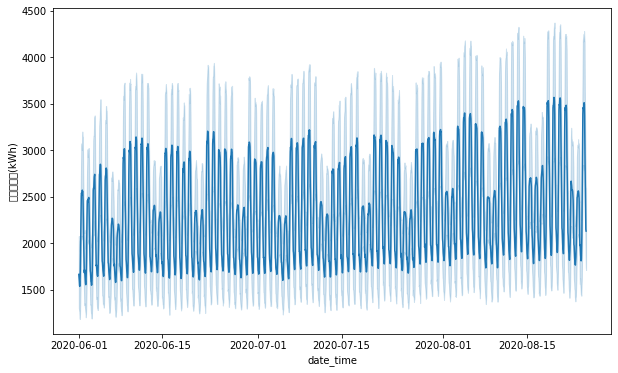

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train, x="date_time", y="전력사용량(kWh)")
plt.show()

- 전력사용량 패턴을 보니, 5일과 2일의 패턴이 다르고, 그러한 패턴이 반복됩니다.

- 주중/주말에 건물의 전력사용량 패턴이 다르다는 사실을 파악하고, 이를 feature로 만들어봅니다.

## 문제 14. is_weekday feature 만들기

- date_time의 요일을 보고, 주중/주말을 구분하는 feature를 생성합니다.

- date_time에서 요일정보를 추출해서, 주중(1), 주말(0)의 feature를 생성합니다.

In [ ]:
# weekday를 확인합니다.
train.date_time.apply(lambda x: x.weekday())

0         0
1         0
2         0
3         0
4         0
         ..
122395    0
122396    0
122397    0
122398    0
122399    0
Name: date_time, Length: 122400, dtype: int64

In [ ]:
# weekday는 0이 월요일이고, 6이 일요일을 나타냅니다.
# 5 이상을 주말, 나머지는 주중으로 나타내는 is_weekday feature를 만들어봅니다.
train["is_weekday"] = np.ones(len(train))
train.loc[train.date_time.apply(lambda x:x.weekday()) >= 5, "is_weekday"] = 0
train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,is_weekday
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,1.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,1.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,1.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,1.0
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,1.0
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,1.0
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,1.0


### 문제 15. test에도 동일하게 is_weekday feature 생성하기

In [ ]:
# weekday는 0이 월요일이고, 6이 일요일을 나타냅니다.
# 5 이상을 주말, 나머지는 주중으로 나타내는 is_weekday feature를 만들어봅니다.
test["is_weekday"] = np.ones(len(test))
test.loc[test.date_time.apply(lambda x:x.weekday()) >= 5, "is_weekday"] = 0
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,is_weekday
0,1,2020-08-25 00:00:00,27.8,1.5,74.0,0.0,0.0,0.0,0.0,1.0
1,1,2020-08-25 01:00:00,27.8,1.5,74.0,0.0,0.0,0.0,0.0,1.0
2,1,2020-08-25 02:00:00,27.8,1.5,74.0,0.0,0.0,0.0,0.0,1.0
3,1,2020-08-25 03:00:00,27.3,1.1,78.0,0.0,0.0,0.0,0.0,1.0
4,1,2020-08-25 04:00:00,27.3,1.1,78.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,29.0,3.3,65.0,0.0,0.8,1.0,1.0,1.0
10076,60,2020-08-31 20:00:00,29.0,3.3,65.0,0.0,0.8,1.0,1.0,1.0
10077,60,2020-08-31 21:00:00,27.9,4.1,68.0,0.0,0.0,1.0,1.0,1.0
10078,60,2020-08-31 22:00:00,27.9,4.1,68.0,0.0,0.0,1.0,1.0,1.0


### 문제 15. 학습에 사용할 데이터 만들기

In [ ]:
# train, test 데이터를 학습에 사용할 수 있는 상태로 만듭니다.
X_train = train.drop(columns=["num", "date_time", "전력사용량(kWh)"])
y_train = train["전력사용량(kWh)"]
X_test = test.drop(columns=["num", "date_time"])

print(X_train.shape, y_train.shape, X_test.shape)

(122400, 8) (122400,) (10080, 8)


### 문제 16. feature scaling

- tree method 계열은 scaling이 필요하지 않지만, linear regression 계열은 scale에 굉장히 민감하기 때문에, 사전에 scaling을 해줍니다.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 스케일 조정된 X_train 데이터 확인하기
X_train_scaled 

array([[-1.95185808,  0.23002093,  0.76196737, ..., -1.46897745,
        -0.96720415,  0.62725005],
       [-1.92251439,  0.49413998,  0.69755844, ..., -1.46897745,
        -0.96720415,  0.62725005],
       [-1.98120177,  0.69222926,  0.69755844, ..., -1.46897745,
        -0.96720415,  0.62725005],
       ...,
       [ 0.89447981, -0.2321874 , -0.59062005, ...,  0.68074565,
         1.03390789,  0.62725005],
       [ 0.83579243, -0.2321874 , -0.39739328, ...,  0.68074565,
         1.03390789,  0.62725005],
       [ 0.83579243,  0.29605069, -0.33298435, ...,  0.68074565,
         1.03390789,  0.62725005]])

### 참고: scikit-learn에서 제공하는 피처 스케일러(scaler)

- `StandardScaler`: 기본 스케일, 각 피처의 평균을 0, 표준편차를 1로 변환
- `RobustScaler`: 위와 유사하지만 평균 대신 중간값(median)과 일분위, 삼분위값(quartile)을 사용하여 이상치 영향을 최소화
- `MinMaxScaler`: 모든 피처의 최대치와 최소치가 각각 1, 0이 되도록 스케일 조정
- `Normalizer`: 피처(컬럼)이 아니라 row마다 정규화되며, 유클리드 거리가 1이 되도록 데이터를 조정하여 빠르게 학습할 수 있게 함

<p> 스케일 조정을 하는 이유는 데이터의 값이 너무 크거나 작을 때 학습이 제대로 되지 않을 수도 있기 때문입니다. 또한 스케일의 영향이 절대적인 분류기(예: knn과 같은 거리기반 알고리즘)의 경우, 스케일 조정을 필수적으로 검토해야 합니다.
    
<p> 반면 어떤 항목은 원본 데이터의 분포를 유지하는 것이 나을 수도 있습니다. 예를 들어, 데이터가 거의 한 곳에 집중되어 있는 feature를 표준화시켜 분포를 같게 만들었을 때, 작은 단위의 변화가 큰 차이를 나타내는 것처럼 학습될 수도 있습니다. 또한 스케일의 영향을 크게 받지 않는 분류기(예: 트리 기반 앙상블 알고리즘)를 사용할 경우에도 성능이 준수하게 나오거나 과대적합(overfitting)의 우려가 적다면 생략할 수도 있습니다.
    
<p> 스케일 조정시 유의해야할 점은 원본 데이터의 의미를 잃어버릴 수 있다는 것입니다. 최종적으로 답을 구하는 것이 목적이 아니라 모델의 해석이나 향후 다른 데이터셋으로의 응용이 더 중요할 때 원 피처에 대한 설명력을 잃어버린다면 모델 개선이 어려울 수도 있습니다. 이 점을 함께 고려하시면 좋겠습니다.

## Step 4. Training

- 공부한 각 머신러닝 회귀 모델들을 돌려보고, 성능을 평가합니다.

- 아래 모델들이 그 대상에 해당합니다.

- Linear Regression / Ridge / Lasso / Random Forest / SVR / xgboost / lightgbm / catboost

### 문제 17. Linear Regression 모델 돌려보기

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

### 문제 18. Linear Regression 모델의 MAE 평가하기

In [ ]:
pred = linear_reg.predict(X_train_scaled)
linear_reg_score = mean_absolute_error(y_train, pred)

print('Linear Regression MAE: {0:0.4f}'.format(linear_reg_score))

Linear Regression MAE: 1279.9271


### 문제 19. Lasso 모델 돌려보기

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

Lasso()

### 문제 20. Lasso 평가하기

In [ ]:
pred = lasso.predict(X_train_scaled)
lasso_score = mean_absolute_error(y_train, pred)

print('Lasso MAE: {0:0.4f}'.format(lasso_score))

Lasso MAE: 1280.1599


### 문제 21. Random Forest 모델 돌려보기

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=5, max_features=0.85)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=5, max_features=0.85)

In [ ]:
pred = rf.predict(X_train_scaled) 
rf_score = mean_absolute_error(y_train, pred)
print('Random Forest MAE : {0:0.4f}'.format(rf_score))

Random Forest MAE : 1255.6137


### 문제 22. Support Vector Machine 모델 돌려보기

In [ ]:
from sklearn.svm import LinearSVR

# 데이터가 10000개 이상일 때는 LinearSVR을 추천합니다.
svr = LinearSVR()
svr.fit(X_train_scaled, y_train)

LinearSVR()

In [ ]:
pred = svr.predict(X_train_scaled) 
svm_score = mean_absolute_error(y_train, pred)
print('Support Vector Machine MAE: {0:0.4f}'.format(svm_score))

Support Vector Machine MAE: 1179.7544


### 문제 23. XGBoost 모델 돌려보기

- xgboost의 구현체가 많지만, 여기서는 sklearn version을 사용합니다.

In [ ]:
from xgboost.sklearn import XGBRegressor

xgb = XGBRegressor(max_depth=6, max_features=0.85)
xgb.fit(X_train_scaled, y_train)

[05:12:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=6, max_features=0.85)

In [ ]:
pred = xgb.predict(X_train_scaled) 
xgb_score = mean_absolute_error(y_train, pred)
print('XGBoost MAE : {0:0.4f}'.format(xgb_score))

XGBoost MAE : 1211.7975


### 문제 24. Light GBM 모델 돌려보기

In [ ]:
from lightgbm.sklearn import LGBMRegressor

lgb = LGBMRegressor(max_depth=6, max_features=0.85)
lgb.fit(X_train_scaled, y_train)

LGBMRegressor(max_depth=6, max_features=0.85)

In [ ]:
pred = lgb.predict(X_train_scaled) 
lgb_score = mean_absolute_error(y_train, pred)
print('LightGBM MAE: {0:0.4f}'.format(lgb_score))

LightGBM MAE: 1219.7405


### 문제 25. Test prediction

- 학습한 모델을 기반하여 test 데이터를 평가합니다. 그 예측값이 대회 제출이 되는 기준입니다.


- 실제 현업에서는 서비스에 들어가는 기술을 test 데이터로 평가합니다. 마치 유저가 들어온 것처럼요.

In [ ]:
# 모델을 하나 정해서, test data에 대한 inference를 진행합니다.
final = lgb.predict(X_test_scaled)
final

array([2669.37447868, 2669.37447868, 2669.37447868, ..., 3010.21633851,
       3010.21633851, 3010.21633851])

In [ ]:
# 제출 템플릿 불러오기
submission = pd.read_csv(base_path + "/sample_submission.csv")
submission

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0
...,...,...
10075,60 2020-08-31 19,0
10076,60 2020-08-31 20,0
10077,60 2020-08-31 21,0
10078,60 2020-08-31 22,0


In [ ]:
# 결과 파일 생성
submission['answer'] = final
submission

,num_date_time,answer
0,1 2020-08-25 00,2669.374479
1,1 2020-08-25 01,2669.374479
2,1 2020-08-25 02,2669.374479
3,1 2020-08-25 03,2342.045690
4,1 2020-08-25 04,2342.045690
...,...,...
10075,60 2020-08-31 19,3836.843705
10076,60 2020-08-31 20,3836.843705
10077,60 2020-08-31 21,3010.216339
10078,60 2020-08-31 22,3010.216339


### 문제 26. 최종 성능 정리

In [ ]:
print('MAE Comparisons for Various Regression Models\n')
print('linear_reg_score:', '{0:0.5f}'.format(linear_reg_score))
print('lasso_score   :', '{0:0.5f}'.format(lasso_score))
print('rf_score   :', '{0:0.5f}'.format(rf_score))
print('svm_score   :', '{0:0.5f}'.format(svm_score))
print('xgb_score   :', '{0:0.5f}'.format(xgb_score))
print('lgb_score   :', '{0:0.5f}'.format(lgb_score))

MAE Comparisons for Various Regression Models

linear_reg_score: 1279.92713
lasso_score   : 1280.15991
rf_score   : 1255.61371
svm_score   : 1179.75438
xgb_score   : 1211.79751
lgb_score   : 1219.74055
